## 1. 算法介绍
**K近邻(K-Nearest Neighbors, KNN)算法** 是一种简单而有效的监督学习算法,主要用于分类和回归任务。KNN的核心思想是"物以类聚",即相似的数据点在特征空间中应该靠近。在分类任务中,KNN通过找到待分类点周围最近的K个邻居,然后通过多数表决来决定待分类点的类别。

## 2. 算法原理

KNN算法的工作原理可以概括为以下步骤:

1. 计算待分类点与训练集中所有点的距离
2. 选择距离最近的K个点
3. 统计这K个点的类别
4. 将待分类点归为出现次数最多的类别

距离计算通常使用欧氏距离,其公式为:

$$
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

其中 $x$ 和 $y$ 是两个n维向量。

K值的选择对算法性能有重要影响。较小的K值可能导致过拟合,而较大的K值可能导致欠拟合。通常通过交叉验证来选择最优的K值。

## 3. 案例分析
在本案例中,我们生成一个二维的模拟数据集,包含300个样本和两个类别。我们使用scikit-learn库中的KNeighborsClassifier来实现KNN算法。主要步骤如下:

1. 数据准备:生成模拟数据并划分训练集和测试集。

2. 选择最佳K值:使用交叉验证来选择最优的K值

3. 模型训练与预测:使用最佳K值创建KNN模型,在训练集上训练,并对测试集进行预测。

4. 模型评估:计算准确率并打印详细的分类报告。

5. 可视化:
   - K值与准确率关系图:展示不同K值对应的交叉验证准确率。
   - K近邻分类结果图:展示分类决策边界,训练集和测试集的分布,以及错误分类的点。
   - 混淆矩阵:直观显示分类结果的正确性和错误类型。


最佳的K值: 3
准确率: 0.93
分类报告:
              precision    recall  f1-score   support

        类别 0       0.91      0.98      0.94        50
        类别 1       0.97      0.88      0.92        40

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90



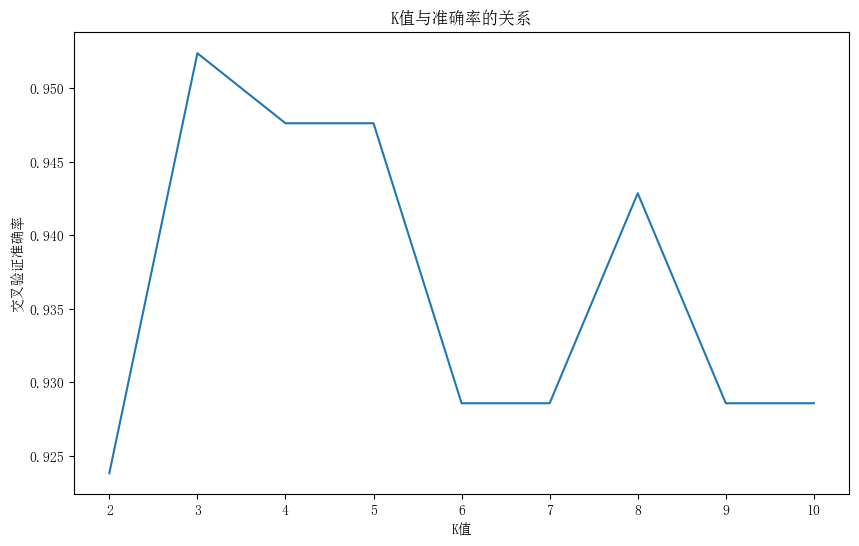

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimSun']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 生成模拟数据
np.random.seed(42)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用交叉验证选择最佳的K值
k_range = range(2, 11)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# 找到最佳的K值
best_k = k_range[k_scores.index(max(k_scores))]
print(f"最佳的K值: {best_k}")

# 使用最佳的K值创建并训练KNN模型
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# 预测
y_pred = knn.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.2f}")

# 打印分类报告
print("分类报告:")
print(classification_report(y_test, y_pred, target_names=['类别 0', '类别 1']))

# 绘制K值与准确率的关系图
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('K值')
plt.ylabel('交叉验证准确率')
plt.title('K值与准确率的关系')
plt.show()


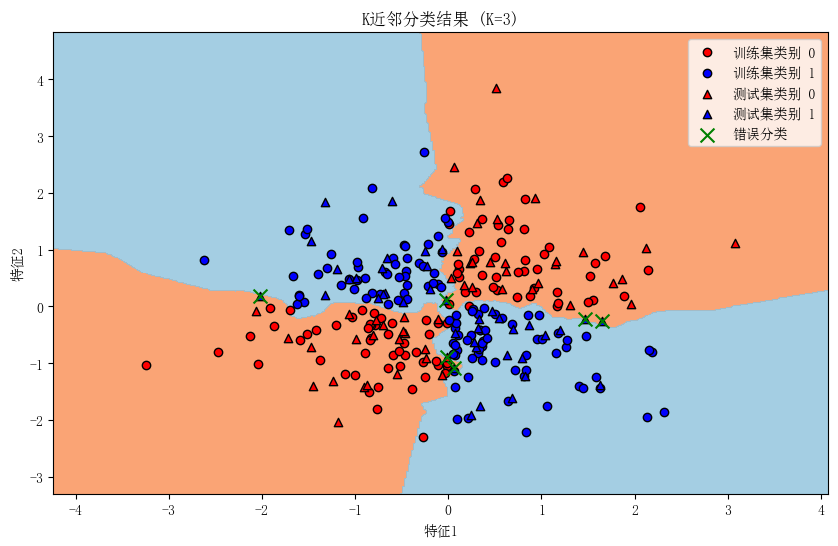

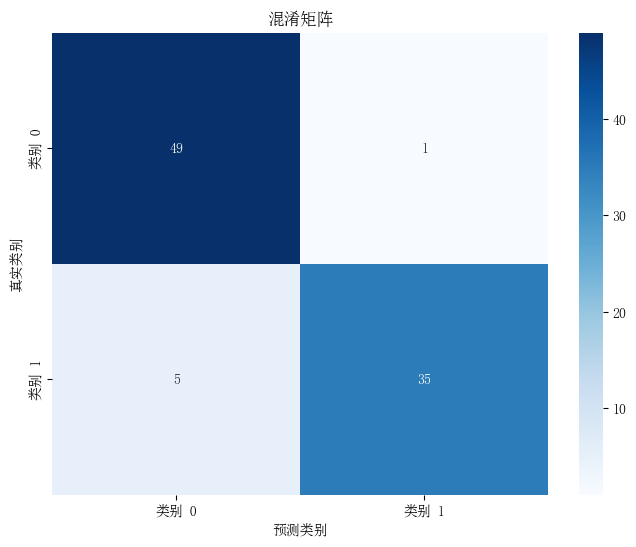

In [3]:
# 创建K近邻分类结果图
plt.figure(figsize=(10, 6))

# 创建网格点
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 预测网格点的类别
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# 绘制训练点
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='red', label='训练集类别 0', edgecolors='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='blue', label='训练集类别 1', edgecolors='k')

# 绘制测试点
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='red', marker='^', label='测试集类别 0', edgecolors='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='blue', marker='^', label='测试集类别 1', edgecolors='k')

# 标记错误分类的点
plt.scatter(X_test[y_pred != y_test][:, 0], X_test[y_pred != y_test][:, 1], 
            c='green', marker='x', s=100, label='错误分类')

plt.title(f'K近邻分类结果 (K={best_k})')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.legend()

plt.show()

# 创建混淆矩阵图
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵')
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.xticks([0.5, 1.5], ['类别 0', '类别 1'])
plt.yticks([0.5, 1.5], ['类别 0', '类别 1'])

plt.show()